# LSST-Y10 DATA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math 
import scipy.integrate as integrate
from astropy.cosmology import Planck15
cosmo = Planck15

## 1. Lens sample

* LSST Y10: Ten photometric bins $(0-1.2)$ with $\Delta z = 0.1$, convolving each bin with Gaussian phot-z scatter with

$$ \sigma_z = 0.03 (1 + z) .$$

In [27]:
zph = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.10, 1.20]

In [28]:
def sigma_lens(z):
    return 0.03 * (1 + z)

In [29]:
def zpdf(z, zphot):
    result = ( 1/( sigma_lens(z) * np.sqrt( 2 * np.pi ) ) ) * np.exp( - (z - zphot)**2/ (2 * sigma_lens(z)**2 ))
    return result

Parametric redshift distribution

$$ \frac{dN}{dz} \propto z^2 e^{- (z/z_0)^{\alpha}}$$

In [30]:
def dndz(z, z0, alpha):
    return np.square(z) * np.exp( - np.power(z / z0, alpha))

The parameters: $(z_0, \alpha) = (0.28, 0.90)$

And normalisation: $n_{eff} = 18$ $arcmin^{-2}$ such that total number of galaxies is $N_{tot} = n_{eff} \times Area$

In [31]:
def nz_lens(z, z0, alpha):
    def dndz_lens(z):
        return dndz(z, 0.26, 0.94)
    norm = integrate.quad(lambda z: dndz_lens(z), 0.0, 1100.0 )[0]
    return np.square(z) * np.exp( - np.power(z / z0, alpha)) / norm

In [32]:
zvec = np.linspace(0, 10, num=500)
n =  nz_lens(zvec, 0.28, 0.90)

Integrated galaxy distribution for the i-th photo-z bin equation

In [33]:
def nzi(z, z0, alpha):
    ni = [0.0]*(len(zph) + 1)  
    xi = [0.0]*(len(zph) + 1)
    for j,elem in enumerate(zph):
        xi[j] = (zph[j] - z)/(sigma_lens(z) * np.sqrt(2))
    for k,char in enumerate(zph):
        ni[k] = 0.5*nz_lens(z,z0, alpha)*( math.erf(xi[k+1]) - math.erf(xi[k]))
    return ni

In [34]:
nbin = np.zeros((len(zvec),(len(zph) + 1)))
for i in range(0,len(zvec)):
    nbin[i] = nzi(zvec[i], 0.28, 0.90)

* Linear bias parameters:

$$b_i = \frac{0.95}{D(z_i)}$$

where $D(z)$ is the linear growth function.

In [35]:
from skypy.power_spectrum import growth_function

In [36]:
def Dz(z, cosmology):
    g0 = growth_function(0, cosmology)
    return growth_function(z, cosmology) / g0

In [37]:
blsst = 0.95 / Dz(zph, cosmo)

## 2. Source Sample

Five photometric bins $(0-\infty)$ with equal number of galaxies, convolving each bin with Gaussian phot-z scatter with

$$ \sigma_z = 0.05 (1 + z) $$

In [38]:
# zphs = [0.2, 0.4, 0.6,0.8, 1.0, 1.2]
zphs = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7]

In [39]:
def sigma_source(z):
    return 0.05 * (1 + z)

The parameters: $(z_0, \alpha) = (0.11, 0.68)$

And normalisation: $n_{eff} = 10$ $arcmin^{-2}$ such that total number of galaxies is $N_{tot} = n_{eff} \times Area$

In [40]:
def nz_source(z, z0, alpha):
    def dndz_source(z):
        return dndz(z, 0.11, 0.68)
    norm = integrate.quad(lambda z: dndz_source(z), 0.0, 1100.0 )[0]
    return np.square(z) * np.exp( - np.power(z / z0, alpha)) / norm

In [41]:
ns =  nz_source(zvec, 0.11, 0.68)

In [42]:
def nzis(z, z0, alpha):
    ni = [0.0]*(len(zphs) + 1) 
    xi = [0.0]*(len(zphs) + 1)
    for j,elem in enumerate(zphs):
        xi[j] = (zphs[j] - z)/(sigma_source(z) * np.sqrt(2))
    for k,char in enumerate(zphs):
        ni[k] = 0.5*nz_source(z,z0, alpha)*( math.erf(xi[k+1]) - math.erf(xi[k]))
    return ni

In [43]:
nbins = np.zeros((len(zvec),(len(zphs) + 1)))
for i in range(0,len(zvec)):
    nbins[i] = nzis(zvec[i], 0.11, 0.68)

In [45]:
x = cosmo.comoving_distance(zvec).value

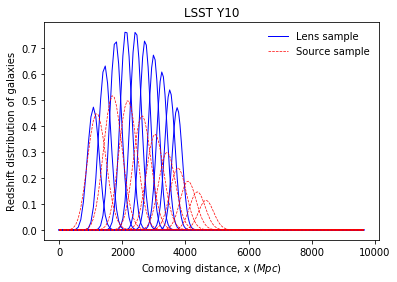

In [46]:
plt.plot(x, nbin[:,0],'b', label='Lens sample', lw=1)
plt.plot(x,nbin[:,1],'b',x, nbin[:,2],'b', x, nbin[:,3],'b' , x, nbin[:,4], 'b', lw=1)
plt.plot(x, nbin[:,5],'b',x,nbin[:,6],'b',x, nbin[:,7],'b', x, nbin[:,8],'b' , x, nbin[:,9],'b', lw=1)

plt.plot(x, nbins[:,0],'--r', label='Source sample', lw=0.7)
plt.plot(x,nbins[:,1],'--r',x, nbins[:,2],'--r', x, nbins[:,3],'--r' , x, nbins[:,4],'--r', lw=0.7)
plt.plot(x, nbins[:,5],'--r',x,nbins[:,6],'--r',x, nbins[:,7],'--r', x, nbins[:,8],'--r' , x, nbins[:,9],'--r', lw=0.7)

plt.ylabel('Redshift distribution of galaxies')
plt.xlabel('Comoving distance, x $(Mpc)$')
plt.title('LSST Y10')
plt.legend(frameon=False)
# plt.xlim(0,3)
plt.show()